# Example of Using FrodoBots Dataset

## Introduction
FrodoBots dataset classifies data according to each Ride Session (`ride_id`). Whenever the driver drives a robot, the system will generate a session id to record the data. The data content is as follows

### 1. Control data (`control_data_{ride_id}.csv`)

| Column Name | Unit | Description | 
| --- | --- | --- |
| linear | % of max control movement (-1 to 1) | Linear control from the gamer input (1 = Forward ; -1 = Backwards) |
| angular | % of max control movement (-1 to 1) | Angular control from the gamer input (1 = Left ; -1 = Right ) |
| rpm_1 | Revolutions Per Minute | RPM reading of the Front-Left wheel |
| rpm_2 | Revolutions Per Minute | RPM reading of the Front-Right wheel |
| rpm_3 | Revolutions Per Minute | RPM reading of the Rear-Left wheel |
| rpm_4 | Revolutions Per Minute | RPM reading of the Rear-Right wheel |
| timestamp | Unix Timestamp Epoch (UTC+0) | Timestamp of the data |

### 2. GPS Data (`gps_data_{ride_id}.csv`)

| Column Name | Unit | Description |
| --- | --- | --- |
| latitude | Float | Latitude of the robot |
| longitude | Float | Longitude of the robot |
| timestamp | Unix Timestamp Epoch (UTC+0) | Timestamp of the data |

### 3. IMU (`imu_data_{ride_id}.csv`)


#### 3.1 Magnetometer

| Column Name | Unit | Description |
| --- | --- | --- |
| x | LSB Raw Data | Positive X = Vertical Up |
| y | LSB Raw Data | Positive Y = West |
| z | LSB Raw Data | Positive Z = South |
| timestamp | Unix Timestamp Epoch (UTC+0) | Timestamp of the data |

**Note: To obtain Gauss you must divide the LSB Raw Data by 3000**

#### 3.2 Accelerometer

| Column Name | Unit | Description |
| --- | --- | --- |
| x | g | Positive X = Upward |
| y | g | Positive Y = Left |
| z | g | Positive Z = Backwards |
| timestamp | Unix Timestamp Epoch (UTC+0) | Timestamp of the data |


#### 3.3 Gyroscope

| Column Name | Unit | Description |
| --- | --- | --- |
| x | Degrees / second | Yaw |
| y | Degrees / second | Pitch |
| z | Degrees / second | Roll |
| timestamp | Unix Timestamp Epoch (UTC+0) | Timestamp of the data |


#### 4. Front camera video timestamps (`front_camera_timestamps_{ride_id}.csv`)

| Column Name | Unit | Description |
| --- | --- | --- |
| frame_id | Integer | Frame number |
| timestamp | Unix Timestamp Epoch (UTC+0) | Timestamp of the data |


#### 5. Rear camera video timestamps (`rear_camera_timestamps_{ride_id}.csv`)

| Column Name | Unit | Description |
| --- | --- | --- |
| frame_id | Integer | Frame number |
| timestamp | Unix Timestamp Epoch (UTC+0) | Timestamp of the data |


#### 6. Microphone recordings timestamps (`mic_audio_timestamps_{ride_id}.csv`)

| Column Name | Unit | Description |
| --- | --- | --- |
| frame_id | Integer | Timestamp Row number |
| timestamp | Unix Timestamp Epoch (UTC+0) | Timestamp of the data |


#### 7. Speaker recordings timestamps (`speaker_audio_timestamps_{ride_id}.csv`)

| Column Name | Unit | Description |
| --- | --- | --- |
| frame_id | Integer | Timestamp Row number |
| timestamp | Unix Timestamp Epoch (UTC+0) | Timestamp of the data |


#### Recordings folder

Inside each session there is a `recordings/` folder that contains the following files:
- TS files for the front and rear cameras, microphone and speaker audio
- M3U8 files for the front and rear cameras, microphone and speaker audio

These files are our RAW recordings, and can be merged into a single MP4 file. However, we highly recommend using the timestamps files to synchronize the data to ensure a correct alignment of the data.


Before executing this program, you can download the [sample](https://frodobots-2k-dataset.s3.ap-southeast-1.amazonaws.com/frodobots-dataset-getting-started.zip) first. And specify the robot id and session id to be processed.



In [1]:
dataset_dir = 'frodobots-dataset-getting-started/ride_19154_20240225023555'
ride_id = dataset_dir.split('_')[1]

In [3]:
! pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 1.9 MB/s eta 0:00:00a 0:00:01


## Control data

In [4]:
import pandas as pd

print(f"{dataset_dir}/control_data_{ride_id}.csv")
control = pd.read_csv(f"{dataset_dir}/control_data_{ride_id}.csv")
control.head()

frodobots-dataset-getting-started/ride_19154_20240225023555/control_data_19154.csv


,linear,angular,rpm_1,rpm_2,rpm_3,rpm_4,timestamp
0,0.0,0.0,0,0,0,0,1.708829e+09
1,0.0,0.0,0,0,0,0,1.708829e+09
2,0.0,0.0,0,0,0,0,1.708829e+09
3,0.0,0.0,0,0,0,0,1.708829e+09
4,0.0,0.0,0,0,0,0,1.708829e+09


### GPS data

In [5]:
import json

gps = pd.read_csv(f"{dataset_dir}/gps_data_{ride_id}.csv")
gps.head()


,latitude,longitude,timestamp
0,-32.048641,115.837914,1708828561727
1,-32.048641,115.837914,1708828561896
2,-32.048641,115.837914,1708828562066
3,-32.048641,115.837914,1708828562221
4,-32.048641,115.837914,1708828562527


### IMU data

In [6]:
imu_data = pd.read_csv(f"{dataset_dir}/imu_data_{ride_id}.csv")[:10]

compass = pd.DataFrame(columns=['x','y','z', 'timestamp'])
accelerometer = pd.DataFrame(columns=['x','y','z', 'timestamp'])
gyroscope = pd.DataFrame(columns=['x','y','z', 'timestamp'])

for compass_row in imu_data['compass']:
    for compass_data in json.loads(compass_row):
        compass.loc[len(compass)] = compass_data

for gyroscope_row in imu_data['gyroscope']:
    for gyroscope_data in json.loads(gyroscope_row):
        gyroscope.loc[len(gyroscope)] = gyroscope_data

for accelerometer_row in imu_data['accelerometer']:
    for accelerometer_data in json.loads(accelerometer_row):
        accelerometer.loc[len(accelerometer)] = accelerometer_data


In [7]:
accelerometer.head()

,x,y,z,timestamp
0,0.18,0.115,-0.453,1708828556.978
1,0.178,0.092,-0.45,1708828556.988
2,0.177,0.098,-0.45,1708828557.003
3,0.182,0.104,-0.445,1708828557.011
4,0.18,0.105,-0.454,1708828557.027


In [8]:
gyroscope.head()

,x,y,z,timestamp
0,2.687,-2.634,1.588,1708828558.128
1,2.74,-2.771,1.672,1708828559.519
2,2.771,-2.565,1.656,1708828560.791
3,2.763,-2.603,1.618,1708828562.082
4,2.802,-2.542,1.519,1708828563.149


In [9]:
compass.head()

,x,y,z,timestamp
0,1553,-991,3,1708828557.014
1,1570,-1007,6,1708828558.023
2,1567,-1007,22,1708828559.03
3,1553,-1012,22,1708828561.044
4,1566,-1003,22,1708828562.043


### Front camera video

/home/noam/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


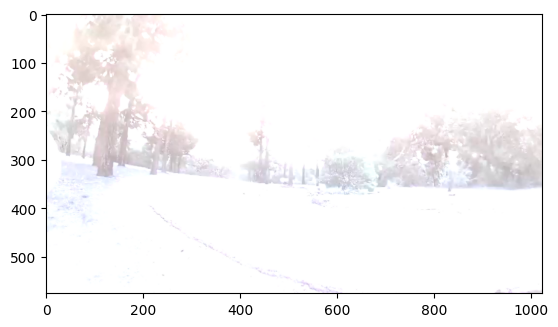

In [10]:
import cv2
from matplotlib import pyplot as plt

front_camera = f"{dataset_dir}/front_camera_{ride_id}.mp4"
capture = cv2.VideoCapture(front_camera)

# Extract five frames
frame_id = 5
while capture.isOpened():
  ret, frame = capture.read()
  if capture.get(cv2.CAP_PROP_POS_FRAMES) == (frame_id-1) and ret:
    plt.imshow(frame)
    break;

In [11]:
# Get timestamp of each frame
front_camera_df = pd.read_csv(f"{dataset_dir}/front_camera_timestamps_{ride_id}.csv")
front_camera_df.head()

,frame_id,timestamp
0,0,1.708829e+09
1,1,1.708829e+09
2,2,1.708829e+09
3,3,1.708829e+09
4,4,1.708829e+09


### Rear camera video

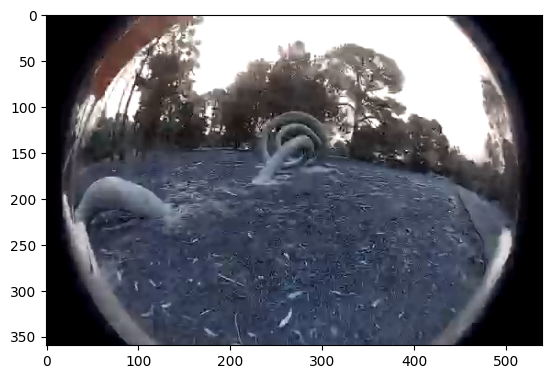

In [12]:
import cv2
from matplotlib import pyplot as plt

rear_camera = f"{dataset_dir}/rear_camera_{ride_id}.mp4"
capture = cv2.VideoCapture(rear_camera)

# Extract five frames
frame_id = 20
while capture.isOpened():
  ret, frame = capture.read()
  if capture.get(cv2.CAP_PROP_POS_FRAMES) == (frame_id-1) and ret:
    plt.imshow(frame)
    break;

In [14]:
# Get timestamp of each frame
front_camera_df = pd.read_csv(f"{dataset_dir}/front_camera_timestamps_{ride_id}.csv")
front_camera_df.head()

,frame_id,timestamp
0,0,1.708829e+09
1,1,1.708829e+09
2,2,1.708829e+09
3,3,1.708829e+09
4,4,1.708829e+09
